In [1]:
import geojson

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import MinMaxScaler

In [2]:
#grid 3586 - working area
#grid 4283 - transport area
#grid 5339 - home area

hours_of_interest = [96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120]
normalized = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]

dfs = pd.DataFrame({})

for i in range(1,10):
    df = pd.read_csv('./csv/sms-call-internet-mi-2013-11-0{}.csv'.format(i), parse_dates=['time'])
    dfs = dfs.append(df)
df = pd.read_csv('./csv/sms-call-internet-mi-2013-11-10.csv', parse_dates=['time'])
dfs = dfs.append(df)
#dfs = dfs.fillna(0)

In [3]:
#Group by hours and aggregate values according to the hour
dfgr = dfs[['cellid', 'time', 'smsin','smsout', 'callin','callout', 'internet']].groupby(['time', 'cellid'], as_index=False).sum()
dfgr['hour'] = dfgr.time.dt.hour+24*(dfgr.time.dt.day-1)
dfgg = dfgr[['hour', 'cellid', 'time', 'smsin','smsout', 'callin','callout', 'internet']].groupby(['hour', 'cellid'], as_index=False).sum()
dfgg = dfgg.set_index(['hour']).sort_index()
print(dfgg)

      cellid     smsin    smsout    callin   callout    internet
hour                                                            
0          1  2.084285  1.104749  0.591930  0.429290   57.799009
0          2  2.091501  1.087979  0.602031  0.438173   57.914858
0          3  2.099183  1.070129  0.612784  0.447628   58.038173
0          4  2.063383  1.153322  0.562672  0.403561   57.463453
0          5  1.870766  1.043851  0.510983  0.373990   52.171423
...      ...       ...       ...       ...       ...         ...
239     9996  6.054090  6.946597  1.640647  4.461988  277.006021
239     9997  7.169133  6.872796  1.482668  5.482080  280.252966
239     9998  6.950347  6.901188  1.509687  5.291210  280.206203
239     9999  4.068024  4.816966  1.490447  2.965692  214.932905
239    10000  3.580726  2.847060  1.250935  2.658222  181.829832

[2399994 rows x 6 columns]


In [4]:
dfs.max()

Unnamed: 0                 5918855
cellid                       10000
time           2013-11-10 23:50:00
countrycode                  97259
smsin                    632.07321
smsout                  594.488542
callin                  287.525497
callout                 301.146658
internet                7936.26538
dtype: object

In [5]:
#dfgg2 = dfgr[['hour', 'cellid', 'time', 'smsin','smsout', 'callin','callout', 'internet']].groupby(['hour'], as_index=True)
#print(dfgg)
cells = dfgg.cellid
scaler=MinMaxScaler()
scaled = pd.DataFrame(scaler.fit_transform(dfgg), columns=dfgg.columns, index=dfgg.index)

In [6]:
dfgg=scaled
dfgg['cellid']=cells
print(dfgg)

      cellid     smsin    smsout    callin   callout  internet
hour                                                          
0          1  0.000785  0.000483  0.000386  0.000271  0.001782
0          2  0.000787  0.000476  0.000393  0.000276  0.001786
0          3  0.000790  0.000468  0.000400  0.000282  0.001789
0          4  0.000777  0.000505  0.000367  0.000255  0.001772
0          5  0.000704  0.000457  0.000333  0.000236  0.001609
...      ...       ...       ...       ...       ...       ...
239     9996  0.002279  0.003039  0.001070  0.002815  0.008541
239     9997  0.002699  0.003007  0.000967  0.003459  0.008641
239     9998  0.002616  0.003020  0.000984  0.003338  0.008639
239     9999  0.001531  0.002108  0.000972  0.001871  0.006627
239    10000  0.001348  0.001246  0.000816  0.001677  0.005606

[2399994 rows x 6 columns]


In [7]:
#dfgg.to_csv("./csv/normalized.csv")
dfgr = dfgg

In [8]:
#dfgr.describe()
#########################################################
#From 01-11 to 10-11 (01,02,03 are weekend/festive days)#
#########################################################

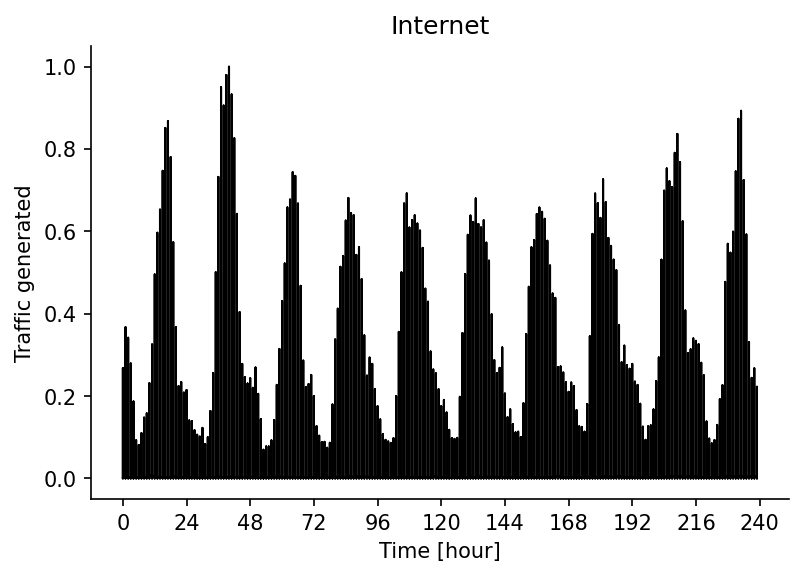

In [9]:
#Office area - industrial zone
ydatai1 = dfgg['internet']
xdatai1 = dfgg['internet'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai1, ydatai1, color='black', linewidth=1, linestyle='-')
plt.title("Internet")
plt.xlabel("Time [hour]")
plt.ylabel("Traffic generated")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
#plt.legend()
sns.despine()
#plt.savefig('./wday-time/int-work-full.png')
plt.show()

/home/manu/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


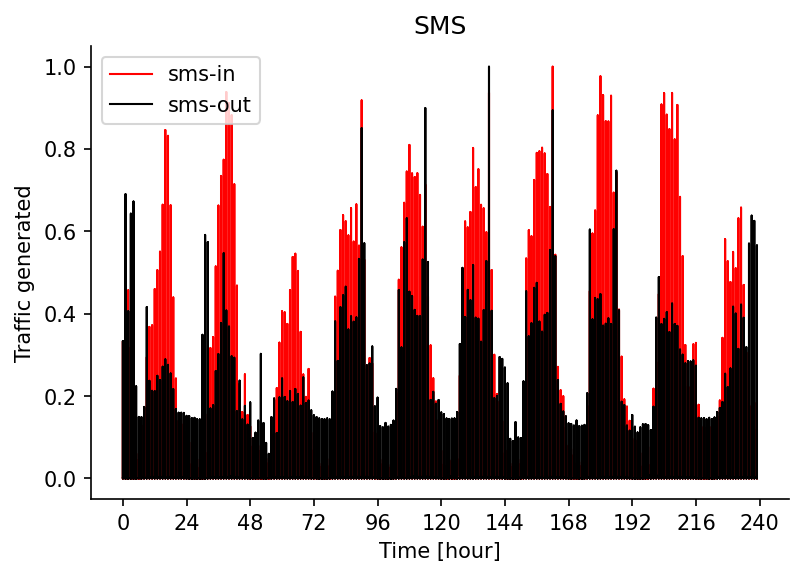

In [10]:
#Office area - industrial zone
ydatai1 = dfgg['smsin']
xdatai1 = dfgg['smsin'].index
ydatai2 = dfgg['smsout']
xdatai2 = dfgg['smsout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai1, ydatai1, color='red', linewidth=1, linestyle='-', label='sms-in')
plt.plot(xdatai2, ydatai2, color='black', linewidth=1, linestyle='-', label='sms-out')
plt.title("SMS")
plt.xlabel("Time [hour]")
plt.ylabel("Traffic generated")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/int-work-full.png')
plt.show()

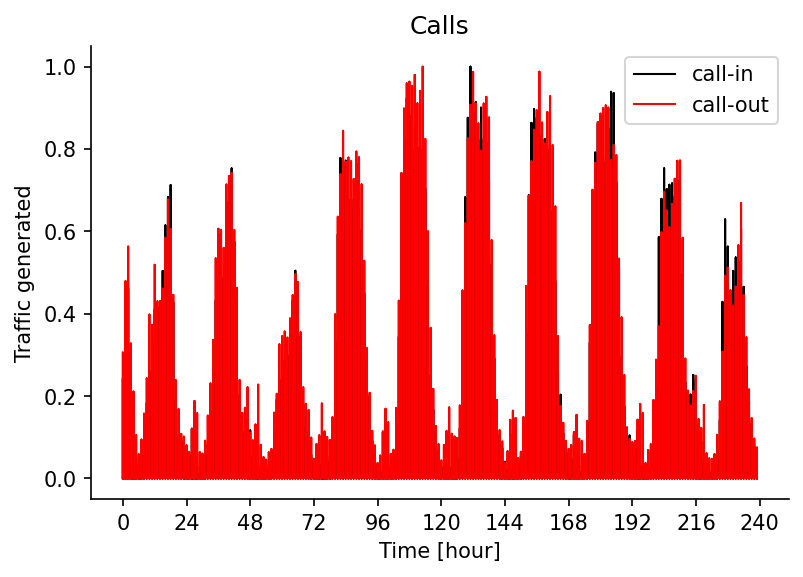

In [11]:
#Office area - industrial zone
ydatai1 = dfgg['callin']
xdatai1 = dfgg['callin'].index
ydatai2 = dfgg['callout']
xdatai2 = dfgg['callout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai1, ydatai1, color='black', linewidth=1, linestyle='-', label='call-in')
plt.plot(xdatai2, ydatai2, color='red', linewidth=1, linestyle='-', label='call-out')
plt.title("Calls")
plt.xlabel("Time [hour]")
plt.ylabel("Traffic generated")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/int-work-full.png')
plt.show()

In [12]:
print("CELL 3586 - office area")

CELL 3586 - office area


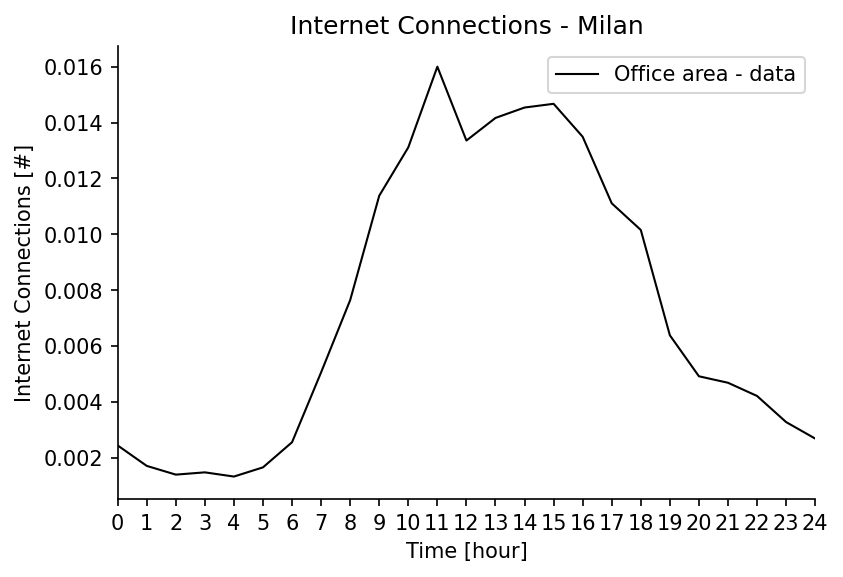

In [13]:
#Office area - industrial zone
ydatai1 = dfgr[dfgr.cellid==3586]['internet']
xdatai1 = dfgr[dfgr.cellid==3586]['internet'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai1, ydatai1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Internet Connections - Working area")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/int-work-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai1, ydatai1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Internet Connections - Milan")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xlim([96,96+24]) #working day - weekday
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine() #removes right and top spines from the plot
#plt.savefig('./wday-time/int-work.png')
plt.show()

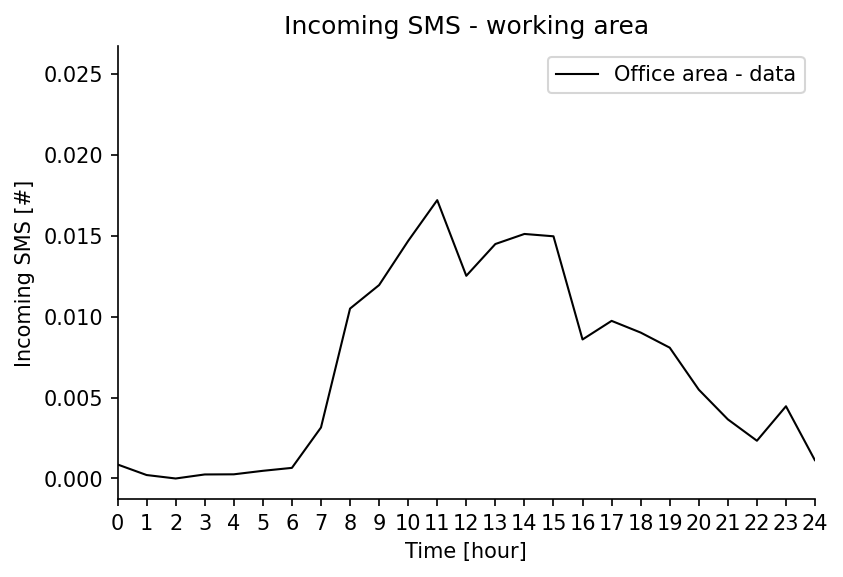

In [14]:

ydatasi1 = dfgr[dfgr.cellid==3586]['smsin']
xdatasi1 = dfgr[dfgr.cellid==3586]['smsin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi1, ydatasi1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Incoming SMS - working area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/smsin-work-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi1, ydatasi1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Incoming SMS - working area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/smsin-work.png')
plt.show()

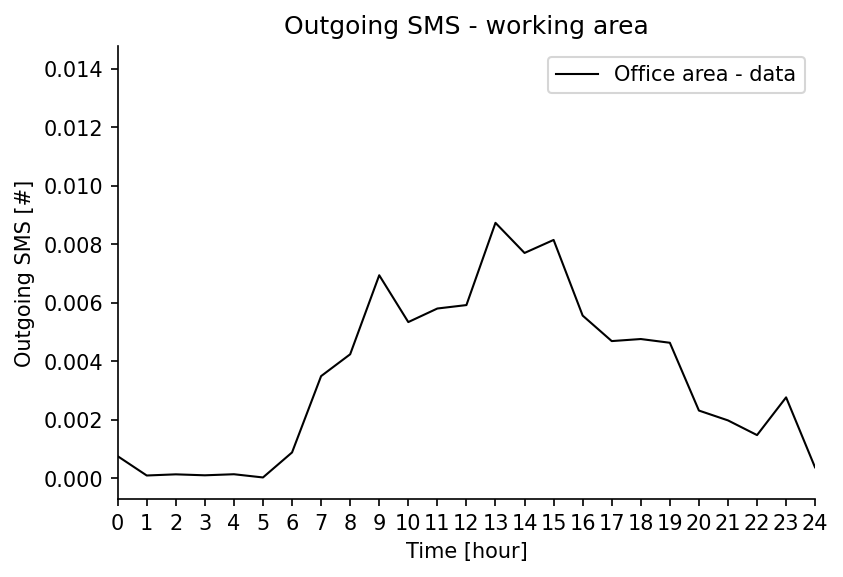

In [15]:

ydataso1 = dfgr[dfgr.cellid==3586]['smsout']
xdataso1 = dfgr[dfgr.cellid==3586]['smsout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso1, ydataso1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Outgoing SMS - working area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/smsout-work-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso1, ydataso1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Outgoing SMS - working area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/smsout-work.png')
plt.show()

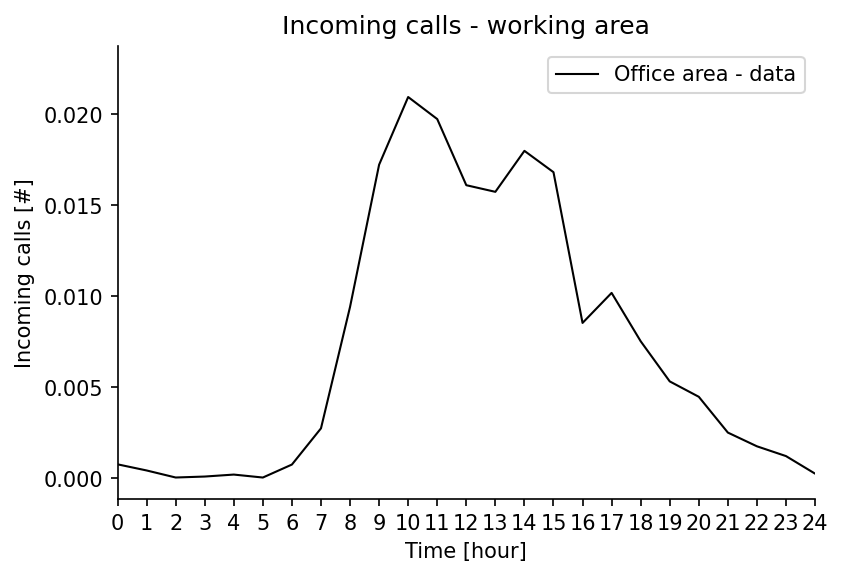

In [16]:

ydataci1 = dfgr[dfgr.cellid==3586]['callin']
xdataci1 = dfgr[dfgr.cellid==3586]['callin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci1, ydataci1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Incoming calls - working area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/callin-work-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci1, ydataci1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Incoming calls - working area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.xlim([0,168])
#plt.ylim([0,4000])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/callin-work.png')
plt.show()

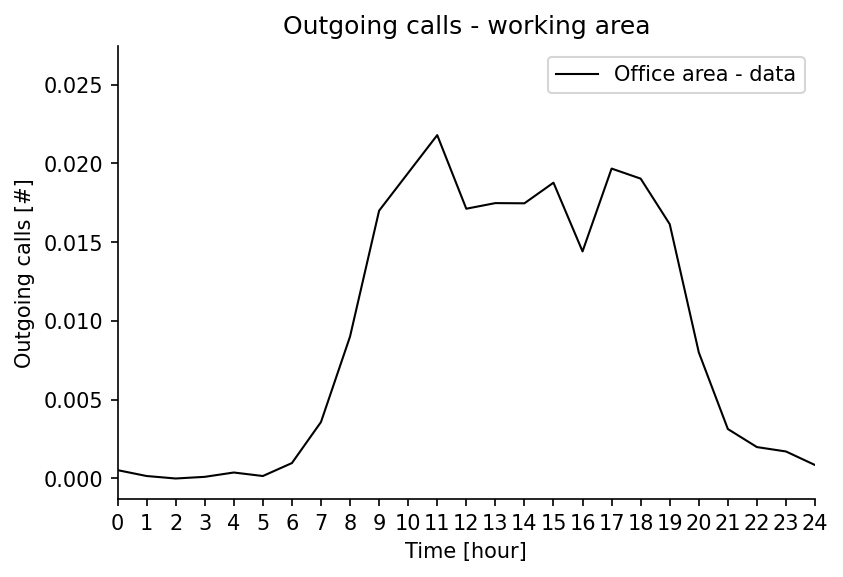

In [17]:

ydataco1 = dfgr[dfgr.cellid==3586]['callout']
xdataco1 = dfgr[dfgr.cellid==3586]['callout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco1, ydataco1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Outgoing calls - working area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/callout-work-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco1, ydataco1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Outgoing calls - working area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/callout-work.png')
plt.show()

In [18]:
print("CELL 4283 - transport area - highway")

CELL 4283 - transport area - highway


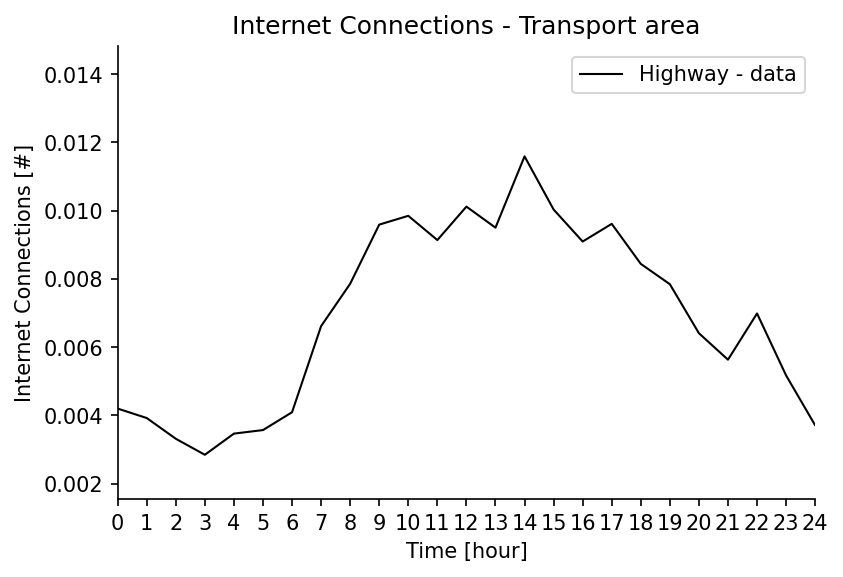

In [19]:
#Transport area (highway) data
ydatai2 = dfgr[dfgr.cellid==4283]['internet']
xdatai2 = dfgr[dfgr.cellid==4283]['internet'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai2, ydatai2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Internet Connections - Transport area")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/int-trans-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai2, ydatai2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Internet Connections - Transport area")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/int-trans.png')
plt.show()

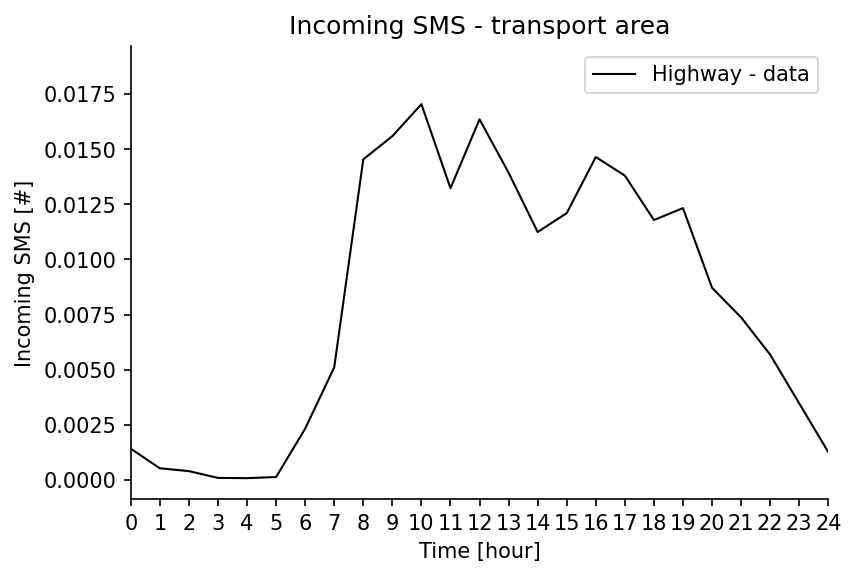

In [20]:

ydatasi2 = dfgr[dfgr.cellid==4283]['smsin']
xdatasi2 = dfgr[dfgr.cellid==4283]['smsin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi2, ydatasi2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Incoming SMS - transport area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/smsin-trans-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi2, ydatasi2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Incoming SMS - transport area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/smsin-trans.png')
plt.show()

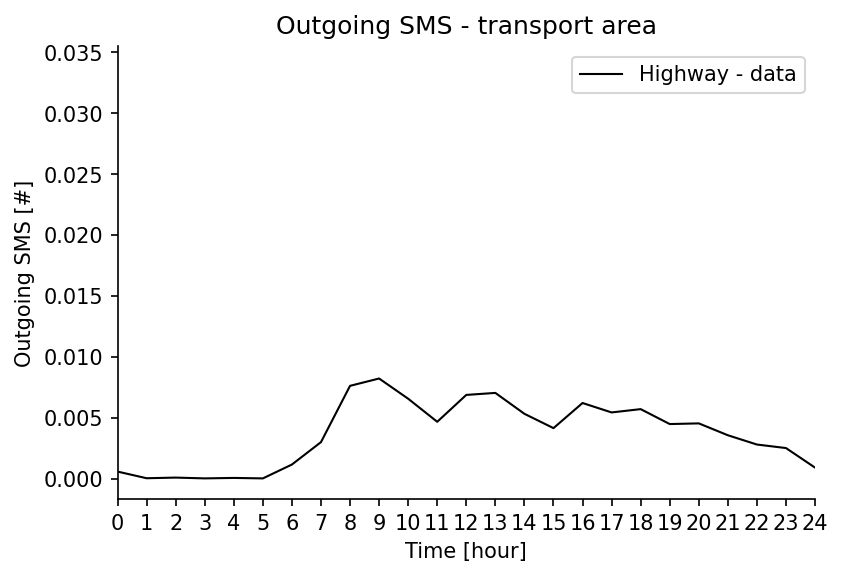

In [21]:

ydataso2 = dfgr[dfgr.cellid==4283]['smsout']
xdataso2 = dfgr[dfgr.cellid==4283]['smsout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso2, ydataso2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Outgoing SMS - transport area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/smsout-trans-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso2, ydataso2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Outgoing SMS - transport area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/smsout-trans.png')
plt.show()

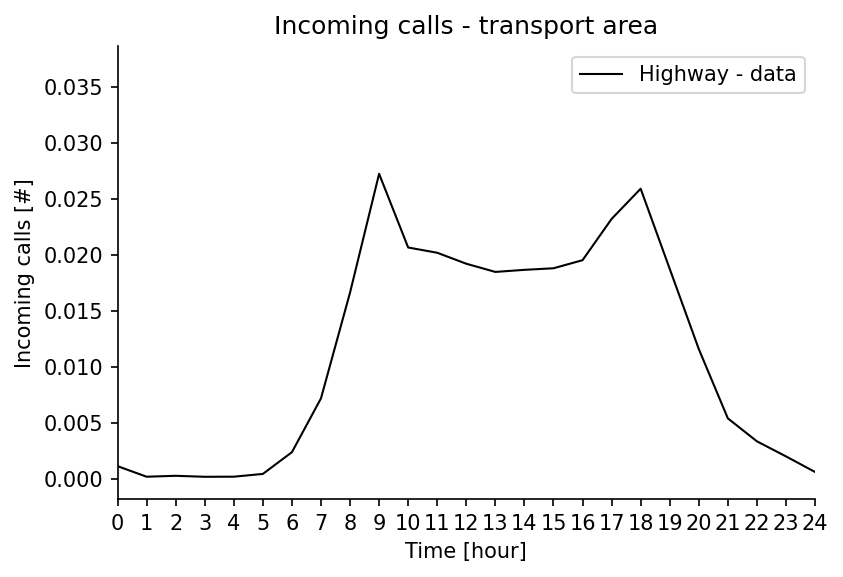

In [22]:

ydataci2 = dfgr[dfgr.cellid==4283]['callin']
xdataci2 = dfgr[dfgr.cellid==4283]['callin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci2, ydataci2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Incoming calls - transport area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/callin-trans-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci2, ydataci2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Incoming calls - transport area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/callin-trans.png')
plt.show()

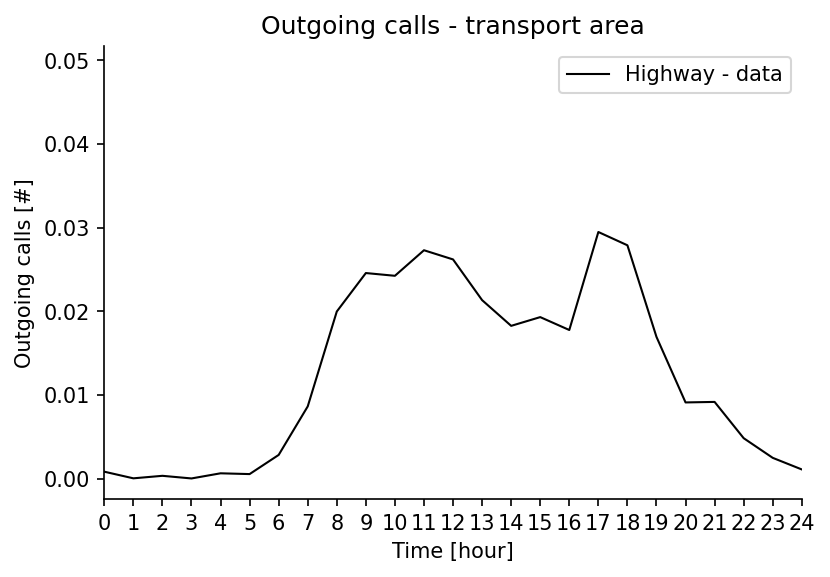

In [23]:

ydataco2 = dfgr[dfgr.cellid==4283]['callout']
xdataco2 = dfgr[dfgr.cellid==4283]['callout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco2, ydataco2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Outgoing calls - transport area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/callout-trans-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco2, ydataco2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Outgoing calls - transport area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/callout-trans.png')
plt.show()

In [24]:
print("CELL 5343 - home area - Via Rembrandt")

CELL 5343 - home area - Via Rembrandt


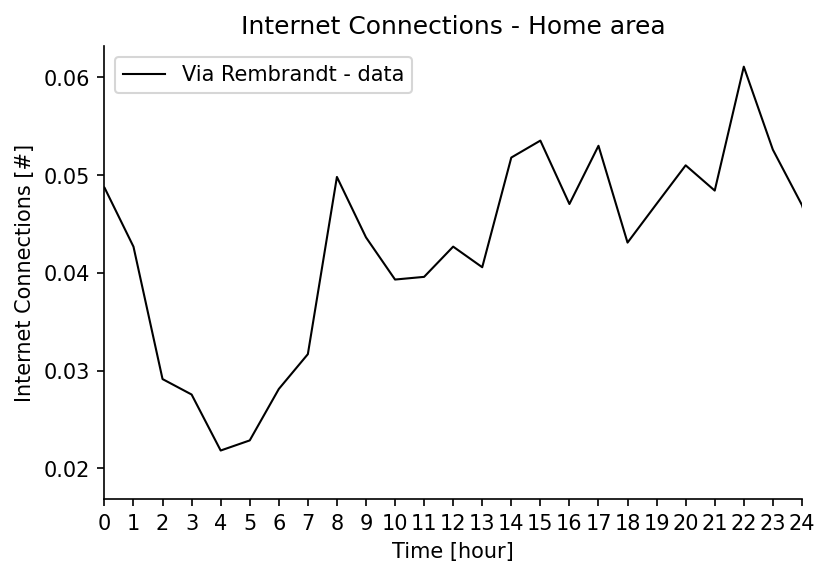

In [25]:
#Home area (near Via Rembrandt) data
ydatai3 = dfgr[dfgr.cellid==5343]['internet']
xdatai3 = dfgr[dfgr.cellid==5343]['internet'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai3, ydatai3, color='black', linewidth=1, linestyle='-', label='Via Rembrandt - data')
plt.title("Internet Connections - Home area")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/int-home-full.png')
plt.close('all')
##########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai3, ydatai3, color='black', linewidth=1, linestyle='-', label='Via Rembrandt - data')
plt.title("Internet Connections - Home area")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/int-home.png')
plt.show()

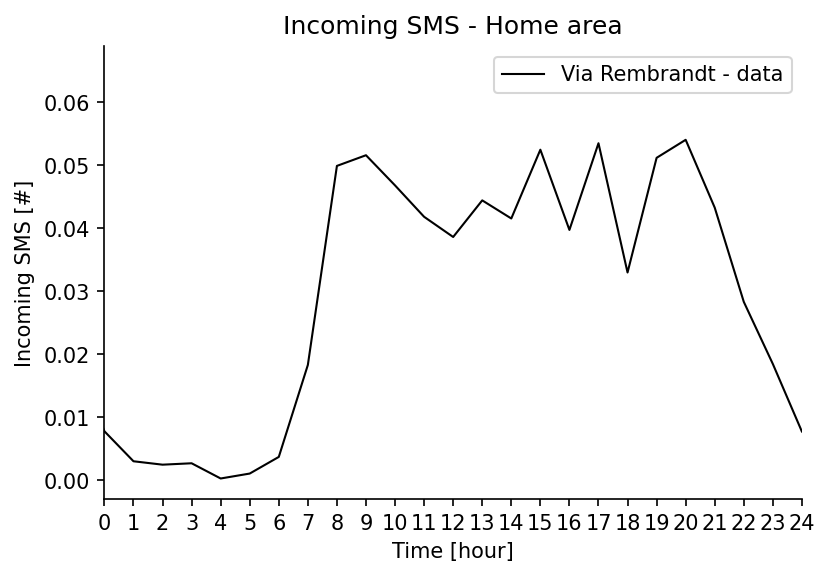

In [26]:

ydatasi3 = dfgr[dfgr.cellid==5343]['smsin']
xdatasi3 = dfgr[dfgr.cellid==5343]['smsin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi3, ydatasi3, color='black', linewidth=1, linestyle='-', label='Via Rembrandt - data')
plt.title("Incoming SMS - Home area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/smsin-home-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi3, ydatasi3, color='black', linewidth=1, linestyle='-', label='Via Rembrandt - data')
plt.title("Incoming SMS - Home area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/smsin-home.png')
plt.show()

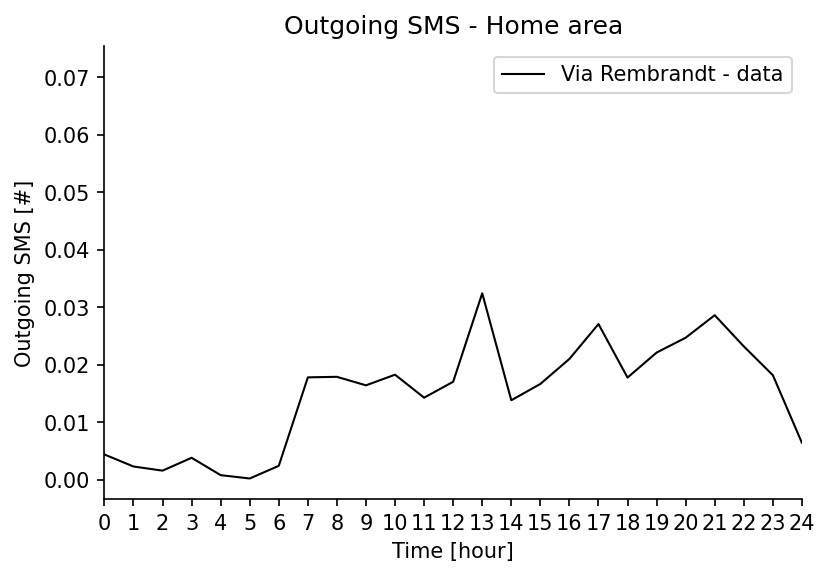

In [27]:

ydataso3 = dfgr[dfgr.cellid==5343]['smsout']
xdataso3 = dfgr[dfgr.cellid==5343]['smsout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso3, ydataso3, color='black', linewidth=1, linestyle='-', label='Via Rembrandt - data')
plt.title("Outgoing SMS - Home area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/smsout-home-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso3, ydataso3, color='black', linewidth=1, linestyle='-', label='Via Rembrandt - data')
plt.title("Outgoing SMS - Home area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/smsout-home.png')
plt.show()

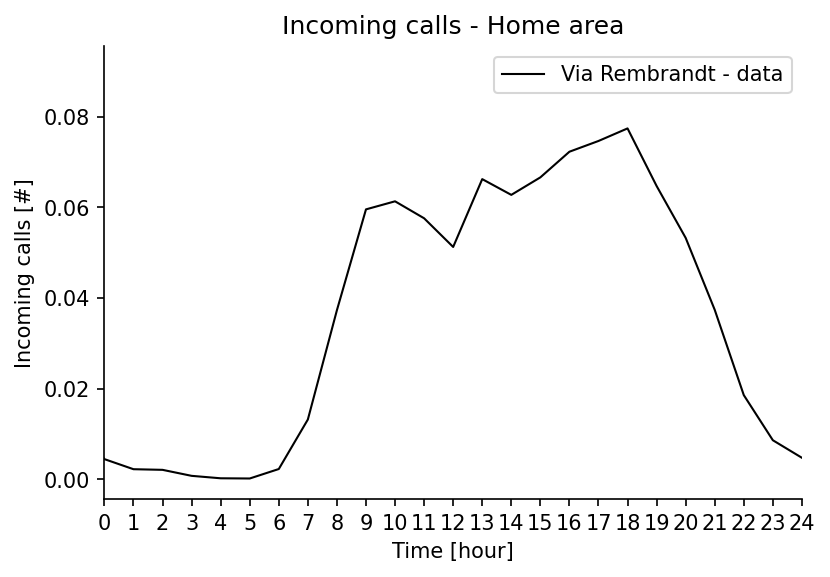

In [28]:

ydataci3 = dfgr[dfgr.cellid==5343]['callin']
xdataci3 = dfgr[dfgr.cellid==5343]['callin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci3, ydataci3, color='black', linewidth=1, linestyle='-', label='Via Rembrandt - data')
plt.title("Incoming calls - Home area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/callin-home-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci3, ydataci3, color='black', linewidth=1, linestyle='-', label='Via Rembrandt - data')
plt.title("Incoming calls - Home area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/callin-home.png')
plt.show()

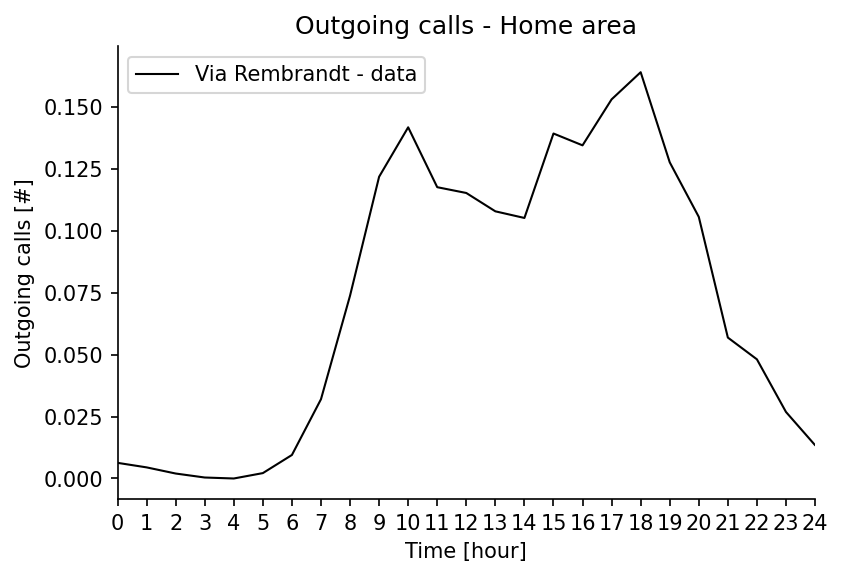

In [29]:

ydataco3 = dfgr[dfgr.cellid==5343]['callout']
xdataco3 = dfgr[dfgr.cellid==5343]['callout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco3, ydataco3, color='black', linewidth=1, linestyle='-', label='Via Rembrandt - data')
plt.title("Outgoing calls - home area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/callout-home-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco3, ydataco3, color='black', linewidth=1, linestyle='-', label='Via Rembrandt - data')
plt.title("Outgoing calls - Home area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/callout-home.png')
plt.show()

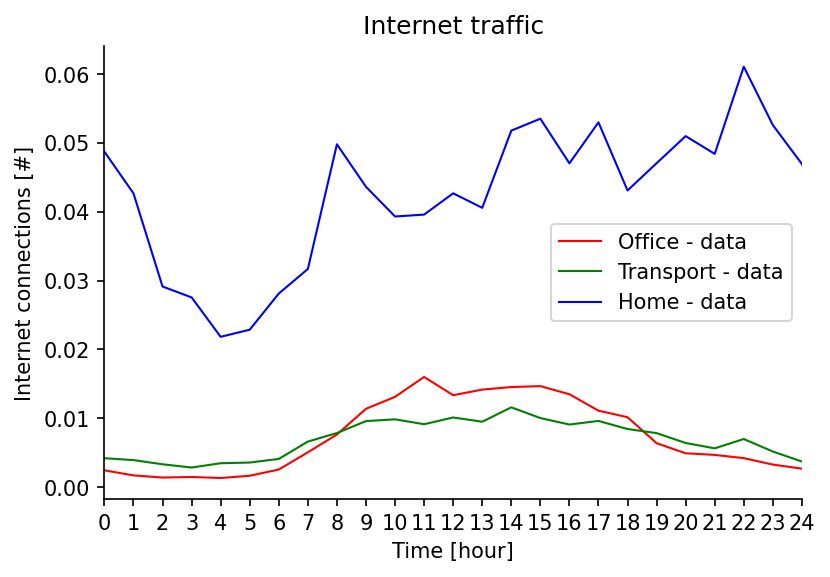

In [30]:
f = plt.figure(dpi=150)
plt.plot(xdatai1, ydatai1, color='red', linewidth=1, linestyle='-', label='Office - data')
plt.plot(xdatai2, ydatai2, color='green', linewidth=1, linestyle='-', label='Transport - data')
plt.plot(xdatai3, ydatai3, color='blue', linewidth=1, linestyle='-', label='Home - data')
plt.title("Internet traffic")
plt.xlabel("Time [hour]")
plt.ylabel("Internet connections [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
plt.legend()
sns.despine()
plt.savefig('./wday-time/internet-comparative2.png')
plt.show()

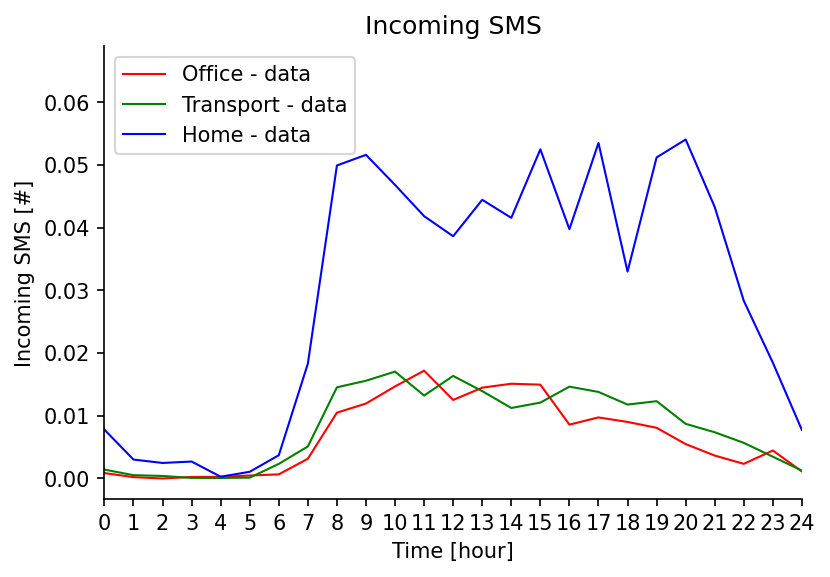

In [31]:
f = plt.figure(dpi=150)
plt.plot(xdatasi1, ydatasi1, color='red', linewidth=1, linestyle='-', label='Office - data')
plt.plot(xdatasi2, ydatasi2, color='green', linewidth=1, linestyle='-', label='Transport - data')
plt.plot(xdatasi3, ydatasi3, color='blue', linewidth=1, linestyle='-', label='Home - data')
plt.title("Incoming SMS")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
plt.legend()
sns.despine()
plt.savefig('./wday-time/smsin-comparative2.png')
plt.show()

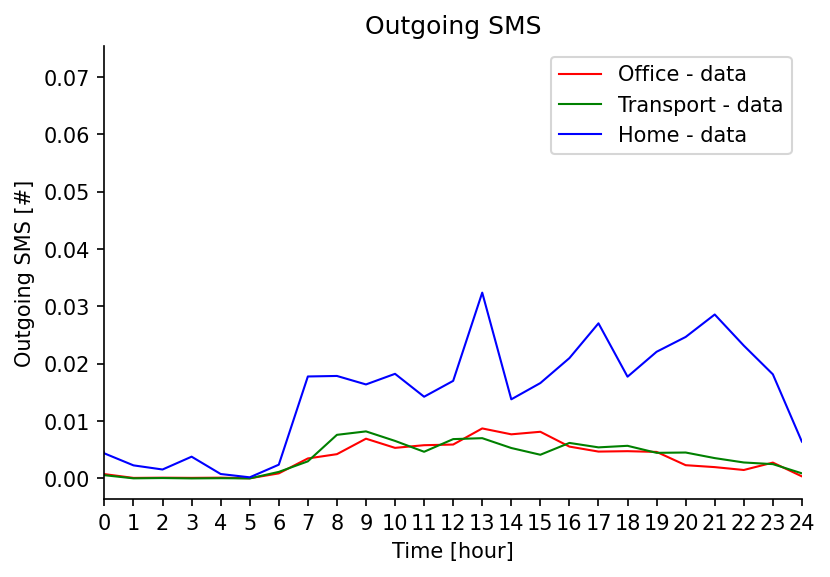

In [32]:
f = plt.figure(dpi=150)
plt.plot(xdataso1, ydataso1, color='red', linewidth=1, linestyle='-', label='Office - data')
plt.plot(xdataso2, ydataso2, color='green', linewidth=1, linestyle='-', label='Transport - data')
plt.plot(xdataso3, ydataso3, color='blue', linewidth=1, linestyle='-', label='Home - data')
plt.title("Outgoing SMS")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
plt.legend()
sns.despine()
plt.savefig('./wday-time/smsout-comparative2.png')
plt.show()

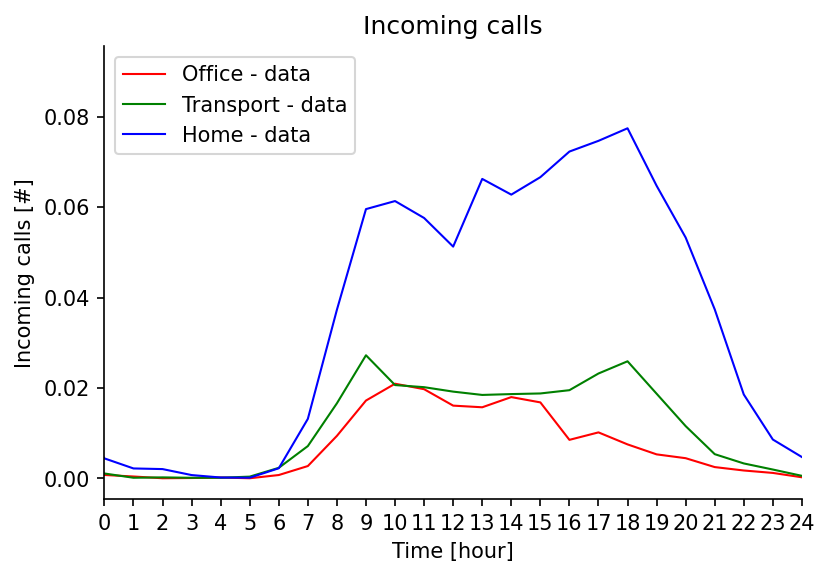

In [33]:
f = plt.figure(dpi=150)
plt.plot(xdataci1, ydataci1, color='red', linewidth=1, linestyle='-', label='Office - data')
plt.plot(xdataci2, ydataci2, color='green', linewidth=1, linestyle='-', label='Transport - data')
plt.plot(xdataci3, ydataci3, color='blue', linewidth=1, linestyle='-', label='Home - data')
plt.title("Incoming calls")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
plt.legend()
sns.despine()
plt.savefig('./wday-time/callin-comparative2.png')
plt.show()

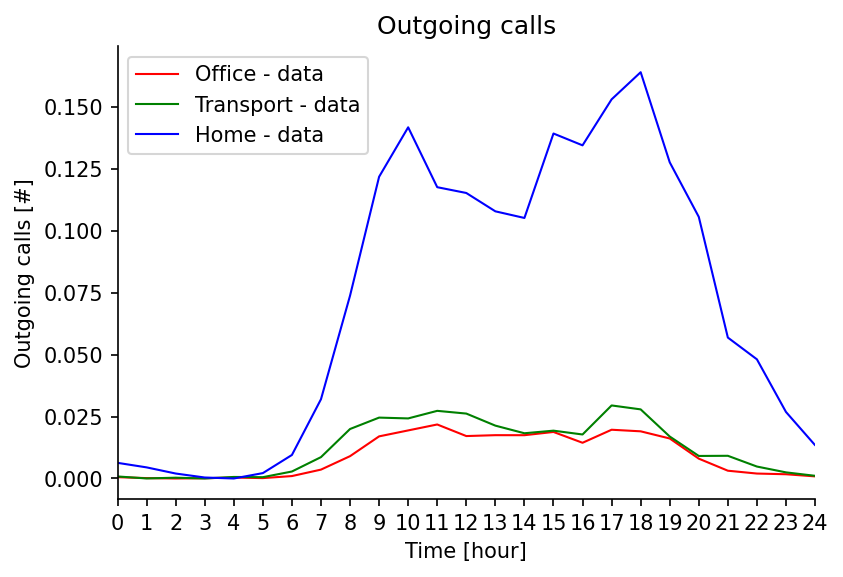

In [34]:
f = plt.figure(dpi=150)
plt.plot(xdataco1, ydataco1, color='red', linewidth=1, linestyle='-', label='Office - data')
plt.plot(xdataco2, ydataco2, color='green', linewidth=1, linestyle='-', label='Transport - data')
plt.plot(xdataco3, ydataco3, color='blue', linewidth=1, linestyle='-', label='Home - data')
plt.title("Outgoing calls")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
plt.legend()
sns.despine()
plt.savefig('./wday-time/callout-comparative2.png')
plt.show()